In [63]:
# Base packages
import os
import numpy as np
import pandas as pd
import json

# Web scraping
from bs4 import BeautifulSoup
import requests

# Misc
from tqdm import tqdm
from datetime import datetime
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Web scraping and data cleaning

## Data source: Grantham Institute Climate Laws data


<img src="logo-gri.png" width=200>

After investigating https://www.climate-laws.org/ with Edge's Developer Console, I've found out that the website's React app gets its JSON data from this link https://www.climate-laws.org/legislation_and_policies.json?offset=[offset]. This will allow me to batch request the data straight from the website's back-end, instead of scraping and cleaning static HTML files.

By: Viet Hung Ha and Anne-Laure Rajaona

In [2]:
# Function to request data
def request_climate_laws_data(offset_batch=np.arange(10, 2100, 10)):
    """
    Get online Climate Laws data from climate-laws.org, and process it into DataFrame
    """
    climate_laws_df = pd.DataFrame()
    for offset in tqdm(offset_batch):
        climate_laws_url = f"https://www.climate-laws.org/legislation_and_policies.json?offset={offset}"
        climate_laws_data = requests.get(climate_laws_url)
        climate_laws_df = climate_laws_df.append(climate_laws_data.json()["items"])
    return climate_laws_df.reset_index()

In [4]:
climate_laws_df = request_climate_laws_data(np.arange(10, 2110, 10))

100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [00:39<00:00,  5.27it/s]


In [5]:
# Exploring dataset
print(f"Data shape: {climate_laws_df.shape}")
print(f"Columns:\n{climate_laws_df.columns}")
climate_laws_df.head()

Data shape: (2100, 24)
Columns:
Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path'],
      dtype='object')


,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,parent_id,tsv,date,link,short_description,geography,date_passed,last_change,legislation_type_humanize,geography_path
0,0,9746,"Consolidated Appropriations Act, 2021","<div>This 2,000 pages-long document implements...",None,consolidated-appropriations-act-2021,192,2021-01-07T21:23:34.475Z,2021-01-07T21:32:20.664Z,published,...,NaN,'000':7B '2':6B '2021':4A 'act':3A 'advisori':...,2020-12-28,"<a href=""/geographies/united-states-of-america...","This 2,000 pages-long document implements a ma...","{'id': 192, 'geography_type': 'national', 'iso...",2020,None,Legislative,/geographies/united-states-of-america
1,1,9767,Green Growth Strategy Through Achieving Carbon...,<div>This document is an industrial policy<str...,None,green-growth-strategy-through-achieving-carbon...,86,2021-03-01T10:30:50.692Z,2021-03-01T10:35:34.284Z,published,...,NaN,'14':60B '2050':45B '5':49B 'achiev':5A 'actio...,2020-12-25,"<a href=""/geographies/japan/policies/green-gro...",This document is an industrial policy which ai...,"{'id': 86, 'geography_type': 'national', 'iso'...",2020,None,Executive,/geographies/japan
2,2,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,NaN,'1':28B '10':126B '13th':222B '2':65B '2003':1...,2020-12-09,"<a href=""/geographies/mexico/laws/general-law-...",This law replaces the 2003 general law for sus...,"{'id': 114, 'geography_type': 'national', 'iso...",2018,"December, 2020",Legislative,/geographies/mexico
3,3,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,NaN,'-2020':94B '4259':3A '6.2':81B '6.4':83B '6.8...,2020-11-27,"<a href=""/geographies/india/policies/notificat...",This document from the Ministry of Environment...,"{'id': 78, 'geography_type': 'national', 'iso'...",2020,None,Executive,/geographies/india
4,4,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,NaN,'-12':731B '-20':205B '-2012':386B '-2020':417...,2020-11-25,"<a href=""/geographies/switzerland/laws/co2-act...","On November 25, 2020, the Federal Council adop...","{'id': 174, 'geography_type': 'national', 'iso...",2013,"November, 2020",Legislative,/geographies/switzerland


In [6]:
# Saving data to use later, instead of requesting from server
os.makedirs("./climate_laws_data", exist_ok=True)
timestamp = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")

climate_laws_df.to_excel(f"./climate_laws_data/{timestamp}_climate_laws_data.xlsx", index=False)

### EDA and data cleaning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

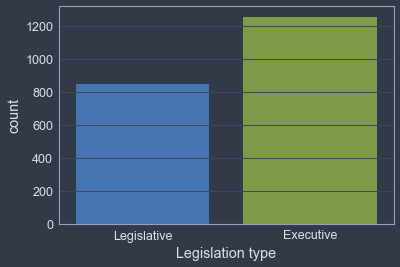

In [8]:
# Types of legislation
legislation_type_plot = sns.countplot(x="legislation_type_humanize", data=climate_laws_df)
plt.xlabel("Legislation type")
plt.show()

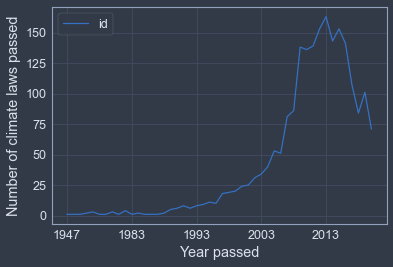

Year with maximum number of laws passed: 


,date_passed,id
40,2013,163


In [9]:
# Date passed - seeing the distribution of pass date of the laws
date_passed_count_df = pd.DataFrame(pd.pivot_table(values="id", index="date_passed", aggfunc='count', data=climate_laws_df).to_records())
date_passed_count_df.plot(x="date_passed", ylabel="Number of climate laws passed", xlabel="Year passed")
plt.show()

print("Year with maximum number of laws passed: ")
date_passed_count_df[date_passed_count_df["id"] == date_passed_count_df["id"].max()]

#### Observations:
The figure above is interesting. 

The number of laws passed started to skyrocket around 1999 and continue to rise until 2013, after which we see a marked decline.

Additionally, we see that 2013 has the highest number of climate laws passed, it will be interesting to see which countries contribute to these? As well as which topics (topic modelling will come later)

#### Update:

This peak coincides with the drafting and signing of the **Paris Agreement** in 2015 and 2016.

## Provisional research question:

"What factors explain the presence of climate laws in a given year?"

In [10]:
# Extracting country name from geography column
def extract_country_name(df):
    return df["geography"]["name"]
climate_laws_df.loc[:, "country_name"] = climate_laws_df.apply(lambda x: extract_country_name(x), axis=1)

In [11]:
# Investigating which countries pass to the Climate laws in 2013
def country_laws_year_passed(year=2013):
    count_df = pd.DataFrame(pd.pivot_table(values="id", index="country_name", aggfunc="count",
                                          data=climate_laws_df[climate_laws_df["date_passed"]==str(year)]).to_records())
    return count_df

In [12]:
# Seeing the Top five countries passing highest number of climate laws in 2013
country_laws_year_passed(year=2013).sort_values("id", ascending=False).head()

,country_name,id
81,Spain,8
31,European Union,5
15,Burkina Faso,5
12,Brazil,5
18,Chile,4


In [13]:
# I've found it a bit surprising to see Burkina Faso on this list, let's investigate which laws were passed
# Helper function
def print_laws_title_country_year(country, year):
    print(f"// {country} - {str(year)}: //")
    for item in climate_laws_df[(climate_laws_df["country_name"]==country) & 
                    (climate_laws_df["date_passed"]==str(year))]["title"]:
        print(item)

print_laws_title_country_year("Burkina Faso", 2013)

// Burkina Faso - 2013: //
National multi-risk plan for disaster preparedness and response
Decree no. 2013-325 (establishing the mission of a national entity responding to climate change)
Law no. 006-2013 (on the Code for the Environment)
Decree no. 2013-151 (on the National Council for the Environment and Sustainable Development)
Law of finance 2013 relative to the deletion of customs charges on equipments and material of solar energy


In [14]:
# Finding out which country/region passes the maximum number of climate laws within a year
_ = pd.DataFrame(pd.pivot_table(values="id", index=["date_passed", "country_name"], aggfunc="count", data=climate_laws_df))

# Print out result
print(f"Maximum number of climate laws passed by country/region in a year:\n{_.iloc[_.id.argmax(), :]}")

Maximum number of climate laws passed by country/region in a year:
id    9
Name: (2009, European Union), dtype: int64


9 climate laws were passed by the European Union in 2009. Let's see what they are 

In [15]:
# 9 laws passed by the EU in 2009
for law in climate_laws_df[(climate_laws_df["date_passed"]=="2009") & (climate_laws_df["country_name"]=="European Union")]["title"]:
    print(law, '\n')

Clean and energy-efficient road transport vehicles (Directive 2009/33/EC on the promotion of clean road transport vehicles in support of low-emission mobility) 

Third Energy Package (Directive on electricity 2009/72/EC, repealing Directive 2003/54/EC and Directive on gas 2009/73/EC, repealing Directive 2003/55/EC) 

Revision of the EU Emission Trading System (EU ETS) (Directive 2009/29/EC amending Directive 2003/87/EC so as to improve and extend the greenhouse gas emission allowance trading scheme of the Community) 

Fuel Quality (Directives 2009/30/EC and 2015/1513 amending Directive 98/70/EC as regards the specification of petrol, diesel and gas-oil and introducing a mechanism to monitor and reduce GHG emissions and amending Council Directive 1999/32/EC as regards the specification of fuel used by inland waterway vessels and repealing Directive 93/12/EEC) 

Emission performance standards for new passenger cars (Regulation (EC) No. 443/2009 setting emission performance standards for 

#### Observation:

Upon further observations, I noticed that the "geography" column contains a lot of useful information, such as the country's World Bank Income Group, Climate Risk index, Percent of Global Emissions, etc. It will be very useful to bring these information into the columns of the main DataFrame.

In [16]:
# Enriching data with more useful information from "geography column"
def percent_global_emissions(df):
    return df["geography"]["percent_global_emissions"]

def climate_risk_index(df):
    return df["geography"]["climate_risk_index"]

def wb_income_group(df):
    return df["geography"]["wb_income_group"]

def eu_member_ind(df):
    return df["geography"]["eu_member"]

def visibility_status(df):
    return df["geography"]["visibility_status"]

def law_discarded_at(df):
    return df["geography"]["discarded_at"]

def federal_ind(df):
    return df["geography"]["federal"]

def legislative_process(df):
    return df["geography"]["legislative_process"]

# Adding columns
for func, name in zip([percent_global_emissions, climate_risk_index, wb_income_group, eu_member_ind, visibility_status, law_discarded_at, federal_ind, legislative_process],
                     ["percent_global_emissions", "climate_risk_index", "wb_income_group", "eu_member_ind", "visibility_status", "law_discarded_at", "federal_ind", "legislative_process"]):
    climate_laws_df.loc[:, name] = climate_laws_df.apply(lambda x: func(x), axis=1)

In [17]:
# Seeing number of laws passed per WB Income Group
pd.DataFrame(pd.pivot_table(values="id", index="wb_income_group", aggfunc="count", data=climate_laws_df.dropna(subset=["wb_income_group"])).to_records())

,wb_income_group,id
0,,4
1,High income,741
2,Low income,237
3,Lower middle income,503
4,Upper middle income,530


**Observation**

Middle income countries are most active at issuing climate laws

In [18]:
# Saving this expanded dataset
timestamp = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")
climate_laws_df.to_excel(f"./climate_laws_data/{timestamp}_climate_laws_data_expanded.xlsx", index=False)

#### Exploring this expanded dataset 

In [19]:
climate_laws_df.head()

,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,legislation_type_humanize,geography_path,country_name,percent_global_emissions,climate_risk_index,wb_income_group,eu_member_ind,law_discarded_at,federal_ind,legislative_process
0,0,9746,"Consolidated Appropriations Act, 2021","<div>This 2,000 pages-long document implements...",None,consolidated-appropriations-act-2021,192,2021-01-07T21:23:34.475Z,2021-01-07T21:32:20.664Z,published,...,Legislative,/geographies/united-states-of-america,United States of America,12.28,44.17,High income,False,None,True,"<p style=""text-align: justify;"">The United Sta..."
1,1,9767,Green Growth Strategy Through Achieving Carbon...,<div>This document is an industrial policy<str...,None,green-growth-strategy-through-achieving-carbon...,86,2021-03-01T10:30:50.692Z,2021-03-01T10:35:34.284Z,published,...,Executive,/geographies/japan,Japan,2.66,69.33,High income,False,None,False,<div><br>The National Diet is the sole law-mak...
2,2,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,Legislative,/geographies/mexico,Mexico,1.45,61.83,Upper middle income,False,None,True,<div>The United Mexican States (Mexico) has a ...
3,3,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,Executive,/geographies/india,India,6.81,38.67,Lower middle income,False,None,True,"<p style=""text-align: justify;"">The Indian par..."
4,4,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,Legislative,/geographies/switzerland,Switzerland,0.1,52.33,High income,False,None,True,"<p style=""text-align: justify;"">Switzerland is..."


In [20]:
climate_laws_df.columns

Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path',
       'country_name', 'percent_global_emissions', 'climate_risk_index',
       'wb_income_group', 'eu_member_ind', 'law_discarded_at', 'federal_ind',
       'legislative_process'],
      dtype='object')

In [21]:
climate_laws_df.head()

,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,legislation_type_humanize,geography_path,country_name,percent_global_emissions,climate_risk_index,wb_income_group,eu_member_ind,law_discarded_at,federal_ind,legislative_process
0,0,9746,"Consolidated Appropriations Act, 2021","<div>This 2,000 pages-long document implements...",None,consolidated-appropriations-act-2021,192,2021-01-07T21:23:34.475Z,2021-01-07T21:32:20.664Z,published,...,Legislative,/geographies/united-states-of-america,United States of America,12.28,44.17,High income,False,None,True,"<p style=""text-align: justify;"">The United Sta..."
1,1,9767,Green Growth Strategy Through Achieving Carbon...,<div>This document is an industrial policy<str...,None,green-growth-strategy-through-achieving-carbon...,86,2021-03-01T10:30:50.692Z,2021-03-01T10:35:34.284Z,published,...,Executive,/geographies/japan,Japan,2.66,69.33,High income,False,None,False,<div><br>The National Diet is the sole law-mak...
2,2,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,Legislative,/geographies/mexico,Mexico,1.45,61.83,Upper middle income,False,None,True,<div>The United Mexican States (Mexico) has a ...
3,3,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,Executive,/geographies/india,India,6.81,38.67,Lower middle income,False,None,True,"<p style=""text-align: justify;"">The Indian par..."
4,4,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,Legislative,/geographies/switzerland,Switzerland,0.1,52.33,High income,False,None,True,"<p style=""text-align: justify;"">Switzerland is..."


In [22]:
pd.DataFrame(pd.pivot_table(values="id", index=["country_name"], aggfunc="count", data=climate_laws_df).to_records())

,country_name,id
0,Afghanistan,14
1,Albania,3
2,Algeria,13
3,Andorra,8
4,Angola,21
...,...,...
193,Venezuela,4
194,Vietnam,26
195,Yemen,6
196,Zambia,17


### Cleaning the core description content

The main description feature contains HTML tags and other items that needs to be cleaned

In [23]:
# Import relevant libraries
import re

In [24]:
# Function to clean up description
def clean_description(df, col="description"):
    # Convert to string
    df[col] = str(df[col])
    # Remove html tags and React non-breaking space characters i.e. &nbsp
    df[col] = re.sub(r"(&nbsp;)|(<([^>]+)>)", " ", df[col])
    # Misc - converting markup ampersand to normal ampersand
    df[col] = re.sub(r"(&amp)", "&", df[col])
    # Convert any double space into single space
    df[col] = df[col].replace("  ", " ")
    # Remove 'nan'
    df[col] = df[col].replace("nan", "")
    # Remove 'None'
    df[col] = df[col].replace("None", "")
    # Trimming leading or trailing space
    df[col] = df[col].strip()
    return df[col]

# Applying the function
climate_laws_df.loc[:, "clean_description"] = climate_laws_df.apply(lambda x: clean_description(x), axis=1)

In [25]:
# Cleaning legislative process column
climate_laws_df.loc[:, "clean_legislative_process"] = climate_laws_df.apply(
    lambda x:clean_description(x, "legislative_process"), axis=1)

In [26]:
climate_laws_df.columns

Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path',
       'country_name', 'percent_global_emissions', 'climate_risk_index',
       'wb_income_group', 'eu_member_ind', 'law_discarded_at', 'federal_ind',
       'legislative_process', 'clean_description',
       'clean_legislative_process'],
      dtype='object')

In [27]:
climate_laws_df["clean_legislative_process"][19]

'France has a bicameral parliamentary system where legislative power belongs to the National Assembly and the Senate. The last election for the National Assembly was held in 2012, the next is scheduled for 2017. The Senate is elected indirectly by Members of Parliament and local representatives. Statute legislation may be proposed by the Council of Ministers or by Members of Parliament; the majority of bills are currently proposed by the government. \n There is a strict separation between laws and regulations. Laws determine general principles and rules in domains explicitly set out in the constitution, such as civil rights, nationality and crime. They must be voted on by the Parliament and can be blocked by the Constitutional Court if it finds that the law goes against the Constitution. In this case, the law must be modified and voted on again, or abandoned. Regulations can establish rules out\xadside of the law’s domain or specify more precisely how to implement laws. Regulations do 

##### Showing an example of a cleaned description 

In [28]:
# An example of before and after
print(climate_laws_df["title"][22])
print('\n')
print(climate_laws_df["description"][22])
print('\n')
print(climate_laws_df["clean_description"][22])

Sustainability Bond Framework 


<div>This document is aimed at supporting the development of the green, social and/or sustainability capital market with the issuance of safe (AAA-rated) and liquid sovereign green, social and/or sustainability bond(s).<br><br>Under this Framework, the Grand Duchy of Luxembourg may issue 3 types of bonds: 1) Green Bonds where an amount equal to the net proceeds will be exclusively used to (re)finance eligible expenditures falling within the Eligible Green categories, 2) Social Bonds where an amount equal to the net proceeds will be exclusively used to (re)finance eligible expenditures falling within the Eligible Social categories,, and 3) Sustainability Bonds where an amount equal to the net proceeds will be exclusively used to (re)finance eligible expenditures falling within both Eligible Green and Social categories.</div>


This document is aimed at supporting the development of the green, social and/or sustainability capital market with the issuance 

In [29]:
# Output this DataFrame to Excel
timestamp = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")
climate_laws_df.to_excel(f"./climate_laws_data/{timestamp}_climate_laws_data_cleaned.xlsx", index=False)

### Clustering description and legislative process --> Giving some structure to the text data 

In [30]:
# Feature extraction and clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

# General NLP libraries
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import string

# Spell correction
from autocorrect import Speller

# Global nlp vars
stop_words = stopwords.words("english")
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

**Observations:**

There are certain words that can be filtered out in the preprocessing steps, including: **law, legal, environment, environmental, action, act, decree, directive**

Since this is a legal context, these words may not be very useful at differentiating and grouping topics together

In [31]:
# Loading in stop words
del_words_general = []
with open('./misc/del_words_general.txt', 'r', encoding="utf8") as file:
    for line in file:
        word = line.split('\n')[0]
        word = word.lower()
        del_words_general.append(word)
file.close()

print('Before: ', del_words_general)

# Adding the generic legal context words
del_words_legal = ['law', 'legal', 'environment', 'environmental', 'action', 'act', 'decree', 'directive']
del_words_total = del_words_general + del_words_legal

print('After: ', del_words_total)

Before:  ['can', 'if', 'else', 'could', 'may', 'should', 'must', 'might', 'would', 'will', 'maybe', 'also', 'ought', 'have', 'or', 'of', 'from', 'to', 'shall']
After:  ['can', 'if', 'else', 'could', 'may', 'should', 'must', 'might', 'would', 'will', 'maybe', 'also', 'ought', 'have', 'or', 'of', 'from', 'to', 'shall', 'law', 'legal', 'environment', 'environmental', 'action', 'act', 'decree', 'directive']


In [32]:
# Helper functions to remove Non-Ascii
def removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('[^a-zA-Z ]+', '', text)
    text = text.replace("nan", "")
    text = text.replace("None", "")
    text = removeNonAscii(text)
    text = re.sub(r'\b\w{0,2}\b', '', text) # Remove any words that are less than 3 characters longth
    text = text.strip()
    return text

In [33]:
def correct_spelling(data, engine=Speller(fast=True)):
    """
    Correct spelling at scale
    """
    result = engine(data)
    return result

In [34]:
# Processing function to clean and tokenize text data
def preprocess(column, stem=False, lemmatize=True, del_words_total_ind=True):
    print("Correcting spelling ...")
    column = [correct_spelling(row) for row in column]
    print("Tokenizing and cleaning text ...")
    column = [clean_text(row) for row in column]
    tokens = [word_tokenize(row) for row in column]
    preprocessed = []
    print("Carrying out core pre-processing processes ...")
    for val in tokens:
        row=[]
        for word in val:
            if word not in stop_words + list(string.punctuation) + del_words_total_ind*del_words_total:
                if stem == True:
                    row.append(ps.stem(word))
                elif lemmatize == True:
                    row.append(lemmatizer.lemmatize(word))
                else:
                    row.append(word)
        preprocessed.append(row)
    assert len(preprocessed) == len(column)
    return preprocessed

In [35]:
# Converting empty string to NaNs
climate_laws_df["clean_description"] = climate_laws_df["clean_description"].apply(lambda x: np.nan if x=="" else x)
climate_laws_df["clean_legislative_process"] = climate_laws_df["clean_legislative_process"].apply(lambda x: np.nan if x=="" else x)

In [36]:
print("# of null descriptions", climate_laws_df["clean_description"].isna().sum())
print("# of null legislative process", climate_laws_df["clean_legislative_process"].isna().sum())

# of null descriptions 5
# of null legislative process 660


#### Observation:

The number of null descriptions is not very high, we can just simply remove those 6 data points from the dataset

In [37]:
# Combining climate law title and description
climate_laws_df["clean_title_plus_desc"] = climate_laws_df.apply(lambda x: str(x["title"]) + " " + str(x["clean_description"]), axis=1)

In [38]:
# Check if there are any NaNs
climate_laws_df["clean_title_plus_desc"].isna().sum()

0

There are null values in this newly contrived feature, which is good, let's head to preprocessing

# Text data preprocessing -> Main variables below!



In [39]:
# Main data points to use --> climate laws title + description
climate_laws_texts = list(climate_laws_df["clean_title_plus_desc"])
climate_laws_texts = preprocess(climate_laws_texts)

Correcting spelling ...
Tokenizing and cleaning text ...
Carrying out core pre-processing processes ...


In [40]:
# Example cleaned output
climate_laws_texts[0]

['consolidated',
 'appropriation',
 'page',
 'long',
 'document',
 'implement',
 'major',
 'government',
 'funding',
 'scheme',
 'includes',
 'economic',
 'stimulus',
 'provision',
 'respond',
 'coronavirus',
 'pandemic',
 'document',
 'contains',
 'numerous',
 'climate',
 'related',
 'clause',
 'notably',
 'encourages',
 'emission',
 'reduction',
 'promotes',
 'renewables',
 'contains',
 'part',
 'carbon',
 'use',
 'set',
 'process',
 'estimate',
 'economic',
 'climate',
 'impact',
 'well',
 'integrated',
 'national',
 'carbon',
 'dioxide',
 'pipeline',
 'system',
 'mandate',
 'climate',
 'security',
 'advisory',
 'council',
 'develop',
 'study',
 'advisory',
 'council',
 'model',
 'strategic',
 'transnational',
 'threat']

### Elbow plot for KMeans model selection 

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
# Dummy func
def dummy_func(doc):
    return doc

In [43]:
# Helper function
def elbow_kmeans_ssd(data, min_n, max_n, step, ngram_range=(1,1), eval_metric='inertia'):
    # Vectorization
    tfidf = TfidfVectorizer(analyzer='word',
                            tokenizer=dummy_func,
                            preprocessor=dummy_func,
                            token_pattern=None,
                            ngram_range=ngram_range
                            )
    tfidf_matrix = tfidf.fit_transform(data)
    print("TF-IDF matrix shape: ", tfidf_matrix.shape)
    # Clustering
    sum_of_square_distances = []
    silhouette_scores = []
    iter_range = range(min_n, max_n, step)
    for k in tqdm(iter_range):
        kmeans_model = MiniBatchKMeans(n_clusters=k,
                                       init='k-means++',
                                       n_init=1,
                                       init_size=2090,
                                       batch_size=2090,
                                       verbose=0,
                                       max_iter=1000,
                                       random_state=0)
        kmeans_model = kmeans_model.fit(tfidf_matrix)
        sum_of_square_distances.append(kmeans_model.inertia_)
        silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans_model.labels_))
    if eval_metric == 'inertia':
        plt.plot(iter_range, sum_of_square_distances, 'bx-')
        plt.xticks(range(min_n, max_n, step))
        plt.xlabel("# of clusters")
        plt.ylabel("Sum of squared distances")
        plt.title("Elbow method for optimal K")
        plt.show()
    elif eval_metric == 'silhouette':
        plt.plot(iter_range, silhouette_scores, '-bx')
        plt.xticks(range(min_n, max_n, step))
        plt.xlabel("# of clusters")
        plt.ylabel("Average silhouette score")
        plt.title("Elbow method for optimal K")
        plt.show()

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2100, 7423)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.28it/s]


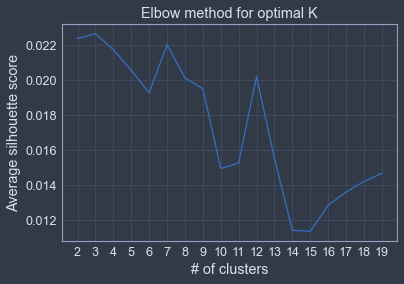

In [44]:
# Running the KMeans elbow plot
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,1), 'silhouette')

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2100, 7423)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.46it/s]


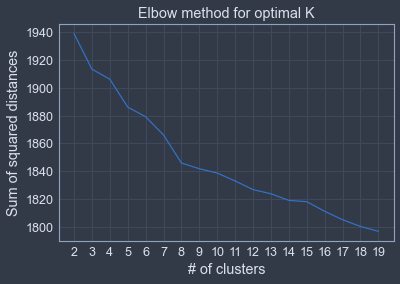

In [45]:
# Running the KMeans elbow plot
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,1), 'inertia')

#### It looks like optimal k for ngram_range (1,1) is about 8 

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2100, 104657)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:12<00:00,  1.42it/s]


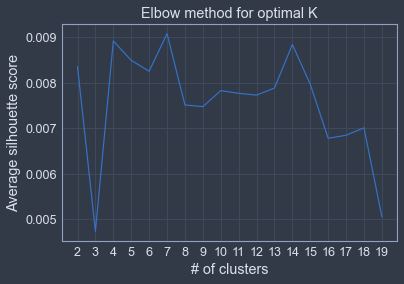

In [46]:
# Let's try ngram (1,2)
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,2), 'silhouette')

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2100, 104657)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:12<00:00,  1.44it/s]


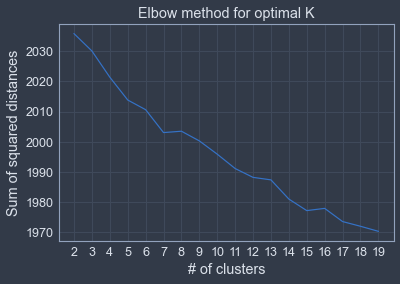

In [47]:
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,2), 'inertia')

#### The optimal K for ngram_range=(1, 2) is 6 or 7.

**Main data:** climate_laws_texts

In [48]:
# Creating dictionary linking climate_laws_texts with unique id in climate_laws_df
climate_ids_to_texts_dict = {key: value for (key, value) in zip(list(climate_laws_df["id"]), climate_laws_texts)}
assert isinstance(climate_ids_to_texts_dict, dict)

In [49]:
# Pipeline function
def tfidf_kmeans(data, k, ngram_range):
    """
    Pipeline function to run TF-IDF vectorization and KMeans clustering
    Returns 2 objects respectively: cluster_labels, cluster_centers
    """
    # Vectorization
    tfidf = TfidfVectorizer(analyzer='word',
                            tokenizer=dummy_func,
                            preprocessor=dummy_func,
                            token_pattern=None,
                            ngram_range=ngram_range
                            )
    tfidf_matrix = tfidf.fit_transform(data)
    # KMeans clustering
    kmeans_model = MiniBatchKMeans(n_clusters=k,
                                       init='k-means++',
                                       n_init=1,
                                       init_size=2090,
                                       batch_size=2090,
                                       verbose=0,
                                       max_iter=1000,
                                       random_state=0)
    kmeans_model = kmeans_model.fit(tfidf_matrix)
    cluster_labels = kmeans_model.labels_
    cluster_centers = kmeans_model.cluster_centers_
    sorted_centroids = cluster_centers.argsort()[:, ::-1] # Returns the list of indices that goes from the largest item to the smallest
    terms = tfidf.get_feature_names()
    return cluster_labels, cluster_centers, sorted_centroids, terms

def compile_kmeans_top_words_df(num_clusters, sorted_centroids, terms, n_top_terms):
    all_keywords = {}
    for i in range(num_clusters):
        topic_keywords = []
        all_keywords[f"{i}"] = []
        for j in sorted_centroids[i, :n_top_terms]:
            topic_keywords.append(terms[j])
        all_keywords[f"{i}"].append(topic_keywords)
    keywords_df = pd.DataFrame({'Cluster': all_keywords.keys()})
    keywords_df['Cluster'] = keywords_df['Cluster'].apply(lambda x: str(x))
    keywords_df.loc[:, "Top Words"] = [" ".join(words) for keywords in all_keywords.values() for words in keywords]
    keywords_df.loc[:, "Top Words separated"] = [" | ".join(words) for keywords in all_keywords.values() for words in keywords]
    return keywords_df

In [50]:
# Baseline pipeline 1 - TF-IDF ngram (1, 1) and then KMeans Clustering @ k = 10
k8_n11_tfidf_labels, k8_n11_tfidf_cluster_centers, k8_n11_sorted_centroids, k8_n11_terms = tfidf_kmeans(climate_laws_texts, 8, (1,1)) 

In [51]:
k8_n11_keywords_df = compile_kmeans_top_words_df(8, k8_n11_sorted_centroids, k8_n11_terms, 20)
k8_n11_keywords_df

,Cluster,Top Words,Top Words separated
0,0,regulation air energy geothermal pollution sta...,regulation | air | energy | geothermal | pollu...
1,1,development national climate plan sustainable ...,development | national | climate | plan | sust...
2,2,energy renewable electricity source power tari...,energy | renewable | electricity | source | po...
3,3,climate change adaptation national plan strate...,climate | change | adaptation | national | pla...
4,4,energy efficiency plan building renewable poli...,energy | efficiency | plan | building | renewa...
5,5,emission tax vehicle fuel biofuels gas carbon ...,emission | tax | vehicle | fuel | biofuels | g...
6,6,disaster risk management national emergency re...,disaster | risk | management | national | emer...
7,7,forest forestry red deforestation national sus...,forest | forestry | red | deforestation | nati...


In [52]:
for i, j in zip(k8_n11_keywords_df['Cluster'], k8_n11_keywords_df['Top Words separated']):
    print(f"Cluster {i}:")
    print(j)

Cluster 0:
regulation | air | energy | geothermal | pollution | standard | electrical | quality | set | motor | atmosphere | water | efficiency | induction | pollutant | ministerial | control | requirement | activity | atmospheric
Cluster 1:
development | national | climate | plan | sustainable | strategy | protection | energy | management | policy | change | carbon | green | resource | sector | project | agricultural | government | document | natural
Cluster 2:
energy | renewable | electricity | source | power | tariff | generation | solar | production | development | wind | grid | use | plant | national | market | project | supply | installation | feed
Cluster 3:
climate | change | adaptation | national | plan | strategy | policy | mitigation | development | sector | management | risk | impact | implementation | emission | framework | sustainable | agriculture | measure | resource
Cluster 4:
energy | efficiency | plan | building | renewable | policy | national | use | sector | consum

In [53]:
# Baseline pipeline 1 - TF-IDF ngram (1, 1) and then KMeans Clustering @ k = 10
k5_n11_tfidf_labels, k5_n11_tfidf_cluster_centers, k5_n11_sorted_centroids, k5_n11_terms = tfidf_kmeans(climate_laws_texts, 5, (1,1)) 

In [54]:
k5_n11_keywords_df = compile_kmeans_top_words_df(5, k5_n11_sorted_centroids, k5_n11_terms, 20)
for i, j in zip(k5_n11_keywords_df['Cluster'], k5_n11_keywords_df['Top Words separated']):
    print(f"Cluster {i}:")
    print(j)

Cluster 0:
regulation | vehicle | energy | building | emission | electric | air | standard | efficiency | requirement | new | fuel | performance | light | car | set | electricity | motor | geothermal | pollution
Cluster 1:
emission | energy | carbon | development | national | tax | plan | climate | gas | project | sustainable | biofuels | transport | strategy | fuel | green | production | sector | policy | protection
Cluster 2:
energy | renewable | efficiency | electricity | source | national | use | policy | plan | sector | development | power | supply | generation | production | target | consumption | efficient | building | promote
Cluster 3:
climate | change | adaptation | national | plan | strategy | policy | development | mitigation | sector | emission | impact | agriculture | energy | management | sustainable | measure | implementation | framework | carbon
Cluster 4:
disaster | management | forest | risk | national | plan | climate | development | change | policy | natural | emer

##### Baseline model 2 with ngram_range=(1,2) 

In [55]:
# Baseline pipeline 2 - TF-IDF ngram (1, 2) and then KMeans Clustering @ k = 7
k7_n12_tfidf_labels, k7_n12_tfidf_cluster_centers, k7_n12_sorted_centroids, k7_n12_terms = tfidf_kmeans(climate_laws_texts, 7, (1,2))

In [56]:
k7_n12_keywords_df = compile_kmeans_top_words_df(7, k7_n12_sorted_centroids, k7_n12_terms, 20)
for i, j in zip(k7_n12_keywords_df['Cluster'], k7_n12_keywords_df['Top Words separated']):
    print(f"Cluster {i}:")
    print(j)

Cluster 0:
vehicle | electric | regulation | motor | standard | scheme | incentive | electric vehicle | energy | tax | car | hybrid | induction | induction motor | import | building | passenger | emission | energy efficiency | efficiency
Cluster 1:
biofuels | carbon | production | biofuel | low carbon | low | tax | fuel | storage | industry | plan | transport | energy | development | euro | green | sector | emission | national | vehicle
Cluster 2:
emission | gas | climate | greenhouse | greenhouse gas | carbon | regulation | change | national | climate change | reduction | tax | gas emission | fuel | project | energy | air | policy | protection | state
Cluster 3:
energy | renewable | renewable energy | efficiency | energy efficiency | electricity | source | use | national | plan | power | policy | national energy | energy source | building | sector | development | supply | production | generation
Cluster 4:
forest | development | climate | sustainable | national | plan | strategy | cha

In [57]:
# Baseline pipeline 4 - TF-IDF ngram (1, 2) and then KMeans Clustering @ k = 10
k10_n12_tfidf_labels, k10_n12_tfidf_cluster_centers, k10_n12_sorted_centroids, k10_n12_terms = tfidf_kmeans(climate_laws_texts, 10, (1,2))

k10_n12_keywords_df = compile_kmeans_top_words_df(10, k10_n12_sorted_centroids, k10_n12_terms, 20)
for i, j in zip(k10_n12_keywords_df['Cluster'], k10_n12_keywords_df['Top Words separated']):
    print(f"Cluster {i}:")
    print(j)

Cluster 0:
regulation | induction | induction motor | motor | energy | resource regulation | standard | energy efficiency | fuel charge | efficiency standard | meet standard | marketing exhibition | preventing manufacturing | import marketing | manufacturing sale | exhibition | efficiency | fail | fail meet | sale import
Cluster 1:
carbon | plan | low carbon | low | climate | industry | development | emission | sector | budget | national | transport | carbon budget | climate change | energy | change | storage | production | period | mining
Cluster 2:
climate | climate change | change | national | adaptation | policy | plan | development | strategy | mitigation | national climate | emission | sustainable | impact | implementation | carbon | change policy | framework | sector | mitigation adaptation
Cluster 3:
energy | efficiency | renewable | energy efficiency | renewable energy | plan | source | national energy | national | policy | use | building | sector | energy policy | development

**Notes: ** It would be good to find a way to label these clusters

#### There are basically 4 different models to evaluate --> Output to Excel file to examine them manually

In [58]:
def output_clustering_excel(output_name, cluster_labels, cluster_results_df, baseline_df = climate_laws_df):
    os.makedirs("./clustering_output", exist_ok=True)
    baseline_df = climate_laws_df.copy()
    baseline_df.loc[:, "Cluster"] = list(map(str, cluster_labels))
    results_df = baseline_df.merge(cluster_results_df, on="Cluster", how="left")
    results_df.to_excel(f"./clustering_output/{output_name}.xlsx", index=False)
    print("Baseline data has been merged with clustering results and exported to Excel")

###### Outputting some Excel files to examine the output

**Update:** after examining the data manually, model with K=10 and ngram=(1, 2) seems to be the best -> Choose this model

In [62]:
# K10 N12
output_clustering_excel("k10_n12_kmeans_tfidf_output", k10_n12_tfidf_labels, k10_n12_keywords_df)

Baseline data has been merged with clustering results and exported to Excel


In [67]:
# Incorporate this into the main DataFrame
climate_laws_df.loc[:, "Cluster"] = list(map(str, k10_n12_tfidf_labels))
climate_laws_df = climate_laws_df.merge(k10_n12_keywords_df, on="Cluster", how="left")

In [70]:
# Rename
climate_laws_df.rename(columns={'Cluster': 'Law Cluster',
                                'Top Words': 'Law Top Words',
                                'Top Words separated': 'Law Top Words separated'
                       }, inplace=True)

climate_laws_df.head()

,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,eu_member_ind,law_discarded_at,federal_ind,legislative_process,clean_description,clean_legislative_process,clean_title_plus_desc,Law Cluster,Law Top Words,Law Top Words separated
0,0,9746,"Consolidated Appropriations Act, 2021","<div>This 2,000 pages-long document implements...",None,consolidated-appropriations-act-2021,192,2021-01-07T21:23:34.475Z,2021-01-07T21:32:20.664Z,published,...,False,None,True,"<p style=""text-align: justify;"">The United Sta...","This 2,000 pages-long document implements a ma...",The United States has a bicameral legislature ...,"Consolidated Appropriations Act, 2021 This 2,0...",9,forest climate change climate change developme...,forest | climate | change | climate change | d...
1,1,9767,Green Growth Strategy Through Achieving Carbon...,<div>This document is an industrial policy<str...,None,green-growth-strategy-through-achieving-carbon...,86,2021-03-01T10:30:50.692Z,2021-03-01T10:35:34.284Z,published,...,False,None,False,<div><br>The National Diet is the sole law-mak...,This document is an industrial policy which a...,The National Diet is the sole law-making organ...,Green Growth Strategy Through Achieving Carbon...,8,emission gas greenhouse greenhouse gas gas emi...,emission | gas | greenhouse | greenhouse gas |...
2,2,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,False,None,True,<div>The United Mexican States (Mexico) has a ...,This law replaces the 2003 general law for sus...,The United Mexican States (Mexico) has a bicam...,General Law for Sustainable Forest Development...,9,forest climate change climate change developme...,forest | climate | change | climate change | d...
3,3,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,False,None,True,"<p style=""text-align: justify;"">The Indian par...",This document from the Ministry of Environment...,The Indian parliament is a bicameral legislatu...,Notification S.O. 4259(E) creating the Apex Co...,2,climate climate change change national adaptat...,climate | climate change | change | national |...
4,4,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,False,None,True,"<p style=""text-align: justify;"">Switzerland is...","On November 25, 2020, the Federal Council adop...",Switzerland is a federal state with 26 cantons...,"CO2 Act (Act 641.71, fully revised version) On...",8,emission gas greenhouse greenhouse gas gas emi...,emission | gas | greenhouse | greenhouse gas |...


### Let's enrich this data with types of government around the world 

In [121]:
# Government type URL
gov_type_url = "https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government"
gov_type_page = requests.get(gov_type_url)
gov_type_soup = BeautifulSoup(gov_type_page.content, 'html.parser')

In [122]:
# Finding the table content of the page
gov_type_table = gov_type_soup.find_all('table')[5]

# UPDATE - Supplement table with partially recognised states
gov_type_table_supplement = gov_type_soup.find_all('table')[6]

In [124]:
# Process the fetched tables into DataFrames
gov_type_df = pd.read_html(str(gov_type_table))[0]
original_len = len(gov_type_df)
gov_type_df_supplement = pd.read_html(str(gov_type_table_supplement))[0]
gov_type_df = gov_type_df.append(gov_type_df_supplement)
assert len(gov_type_df) > original_len, "Check the fetched tables"

# Show
gov_type_df.head()

,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,Constitutional monarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,Republic,Executive,Presidency is independent of legislature


In [126]:
gov_type_df.fillna('', inplace=True)

In [127]:
gov_type_df['government_type'] = gov_type_df['Constitutional form'] + " - " + gov_type_df['Head of state']

In [128]:
gov_type_df.head()

,Name,Constitutional form,Head of state,Basis of executive legitimacy,government_type
0,Afghanistan,Republic,Executive,Presidency is independent of legislature,Republic - Executive
1,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence,Republic - Ceremonial
2,Algeria,Republic,Executive,Presidency independent of legislature; ministr...,Republic - Executive
3,Andorra,Constitutional monarchy,Ceremonial,Ministry is subject to parliamentary confidence,Constitutional monarchy - Ceremonial
4,Angola,Republic,Executive,Presidency is independent of legislature,Republic - Executive


In [131]:
# Clean up some non-breaking space characters
def clean_gov_type(text):
    text = re.sub(r"(\xa0)", " ", text)
    if text == "Provisional - ":
        text = "Provisional"
    return text

In [132]:
gov_type_df["government_type"] = gov_type_df["government_type"].apply(lambda x: clean_gov_type(x))

In [133]:
# See which countries are the Climate laws but not in Gov Type Dataframe
np.setdiff1d(list(climate_laws_df['country_name']), list(gov_type_df['Name']))

array(['Brunei Darussalam', 'Cabo Verde', 'China', 'Congo', 'Czechia',
       'Democratic Republic of Congo', 'European Union', 'Gambia',
       "Lao People's Democratic Republic", 'Micronesia',
       'North Macedonia (Republic of North Macedonia)',
       'Sao Tome and Principe', 'South Korea', 'Taiwan', 'Timor-Leste',
       'United States of America'], dtype='<U45')

In [135]:
# Hash map dict to relabel
country_names_hash_map = {'Brunei Darussalam': 'Brunei',
                          'Cabo Verde': 'Cape Verde',
                          'China': "China, People's Republic of",
                          'Congo': "Congo, Republic of the",
                          'Czechia': 'Czech Republic',
                          'Democratic Republic of Congo': 'Congo, Democratic Republic of the',
                          'Gambia': 'Gambia, The',
                          "Lao People's Democratic Republic": 'Laos',
                          'Micronesia': 'Federated States of Micronesia',
                          'North Macedonia (Republic of North Macedonia)': 'North Macedonia',
                          'Sao Tome and Principe': 'São Tomé and Príncipe',
                          'South Korea': 'Korea, South',
                          'Taiwan': 'Republic of China',
                          'Timor-Leste': 'East Timor',
                          'United States of America': 'United States'
                         }

def relabel_country_name(text, hash_map=country_names_hash_map):
    if text in list(hash_map.keys()):
        text = hash_map[text]
    return text

In [136]:
# Relabel the country names in climate_laws_df
climate_laws_df['country_name'] = climate_laws_df['country_name'].apply(lambda x: relabel_country_name(x))

In [138]:
np.setdiff1d(list(climate_laws_df['country_name']), list(gov_type_df['Name']))

array(['European Union'], dtype='<U33')

In [140]:
# Add European Union to Government Type dataframe
gov_type_df = gov_type_df.append({'Name': 'European Union', 
                                  'government_type': 'Republic - Executive'}, ignore_index=True)

In [142]:
gov_type_df.rename(columns={'Name': 'country_name'}, inplace=True)

In [143]:
# Enrich data with government type
climate_laws_df = climate_laws_df.merge(gov_type_df[['country_name', 'government_type']], on='country_name', how='left')

In [147]:
climate_laws_df.rename(columns={'Law Cluster': 'law_cluster',
                                'Law Top Words': 'law_top_words',
                                'Law Top Words separated': 'law_top_words_sep'}, inplace=True)

climate_laws_df.head()

,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,law_discarded_at,federal_ind,legislative_process,clean_description,clean_legislative_process,clean_title_plus_desc,law_cluster,law_top_words,law_top_words_sep,government_type
0,0,9746,"Consolidated Appropriations Act, 2021","<div>This 2,000 pages-long document implements...",None,consolidated-appropriations-act-2021,192,2021-01-07T21:23:34.475Z,2021-01-07T21:32:20.664Z,published,...,None,True,"<p style=""text-align: justify;"">The United Sta...","This 2,000 pages-long document implements a ma...",The United States has a bicameral legislature ...,"Consolidated Appropriations Act, 2021 This 2,0...",9,forest climate change climate change developme...,forest | climate | change | climate change | d...,Republic - Executive
1,1,9767,Green Growth Strategy Through Achieving Carbon...,<div>This document is an industrial policy<str...,None,green-growth-strategy-through-achieving-carbon...,86,2021-03-01T10:30:50.692Z,2021-03-01T10:35:34.284Z,published,...,None,False,<div><br>The National Diet is the sole law-mak...,This document is an industrial policy which a...,The National Diet is the sole law-making organ...,Green Growth Strategy Through Achieving Carbon...,8,emission gas greenhouse greenhouse gas gas emi...,emission | gas | greenhouse | greenhouse gas |...,Constitutional monarchy - Ceremonial
2,2,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,None,True,<div>The United Mexican States (Mexico) has a ...,This law replaces the 2003 general law for sus...,The United Mexican States (Mexico) has a bicam...,General Law for Sustainable Forest Development...,9,forest climate change climate change developme...,forest | climate | change | climate change | d...,Republic - Executive
3,3,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,None,True,"<p style=""text-align: justify;"">The Indian par...",This document from the Ministry of Environment...,The Indian parliament is a bicameral legislatu...,Notification S.O. 4259(E) creating the Apex Co...,2,climate climate change change national adaptat...,climate | climate change | change | national |...,Republic - Ceremonial
4,4,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,None,True,"<p style=""text-align: justify;"">Switzerland is...","On November 25, 2020, the Federal Council adop...",Switzerland is a federal state with 26 cantons...,"CO2 Act (Act 641.71, fully revised version) On...",8,emission gas greenhouse greenhouse gas gas emi...,emission | gas | greenhouse | greenhouse gas |...,Republic - Executive


#### Query idea: What is the association between government type and the type (cluster) of climate laws passed?

In [155]:
# Importing Association Rules and Apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [169]:
# Checking if there are any nulls in the two features we care about
print(climate_laws_df[['law_cluster', 'government_type']].isna().sum())

law_cluster        0
government_type    0
dtype: int64


In [175]:
# TransactionEncoder
transaction_encoder = TransactionEncoder()

# Preparing dataset for Apriori
cluster_plus_gov_type_data = list(map(list, list(zip(climate_laws_df['law_cluster'], climate_laws_df['government_type']))))
print('Zipped list:\n', cluster_plus_gov_type_data[:5])

# Encoding them into transaction
cluster_plus_gov_type_data = transaction_encoder.fit_transform(cluster_plus_gov_type_data)
print('Encoded transactions:\n', cluster_plus_gov_type_data[:5])

# Into DataFrame
cluster_plus_gov_type_data = pd.DataFrame(cluster_plus_gov_type_data, columns=transaction_encoder.columns_)
cluster_plus_gov_type_data.head()

Zipped list:
 [['9', 'Republic - Executive'], ['8', 'Constitutional monarchy - Ceremonial'], ['9', 'Republic - Executive'], ['2', 'Republic - Ceremonial'], ['8', 'Republic - Executive']]
Encoded transactions:
 [[False False False False False False False False False  True False False
  False False False  True]
 [False False False False False False False False  True False False  True
  False False False False]
 [False False False False False False False False False  True False False
  False False False  True]
 [False False  True False False False False False False False False False
  False False  True False]
 [False False False False False False False False  True False False False
  False False False  True]]


,0,1,2,3,4,5,6,7,8,9,Absolute monarchy - Executive,Constitutional monarchy - Ceremonial,Constitutional monarchy - Executive,Provisional,Republic - Ceremonial,Republic - Executive
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [244]:
# Apriori to extract frequent itemsets
cluster_plus_gov_type_apriori_df = apriori(cluster_plus_gov_type_data, min_support=0.01, use_colnames=True)

cluster_plus_gov_type_association_rules_df = association_rules(cluster_plus_gov_type_apriori_df, metric="confidence", min_threshold=0.2)

# See antecendents as government type only
cluster_plus_gov_type_association_rules_df['antecedents'] = cluster_plus_gov_type_association_rules_df['antecedents'].apply(
    lambda x: list(x)[0]).astype("unicode")
cluster_plus_gov_type_association_rules_df['consequents'] = cluster_plus_gov_type_association_rules_df['consequents'].apply(
    lambda x: list(x)[0]).astype("unicode")

In [245]:
# View 1 - government type as antecedents
gov_type_assoc_view_1 = cluster_plus_gov_type_association_rules_df[~cluster_plus_gov_type_association_rules_df['antecedents']\
                                           .isin(climate_laws_df['law_cluster'].unique())].sort_values('confidence', ascending=False)
gov_type_assoc_view_1 = gov_type_assoc_view_1.merge(k10_n12_keywords_df[['Cluster', 'Top Words separated']].applymap(str), left_on='consequents', right_on='Cluster')

gov_type_assoc_view_1.drop(columns=['Cluster'], inplace=True)

gov_type_assoc_view_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Top Words separated
0,Republic - Ceremonial,3,0.208571,0.212381,0.060952,0.292237,1.376006,0.016656,1.112829,energy | efficiency | renewable | energy effic...
1,Republic - Ceremonial,4,0.208571,0.223333,0.056190,0.269406,1.206297,0.009610,1.063063,energy | electricity | renewable | renewable e...
2,Constitutional monarchy - Ceremonial,4,0.180476,0.223333,0.044762,0.248021,1.110542,0.004456,1.032830,energy | electricity | renewable | renewable e...
3,Republic - Executive,4,0.551905,0.223333,0.115714,0.209664,0.938792,-0.007544,0.982704,energy | electricity | renewable | renewable e...
4,Republic - Executive,9,0.551905,0.206667,0.116190,0.210526,1.018676,0.002130,1.004889,forest | climate | change | climate change | d...


In [246]:
gov_type_assoc_view_2 = cluster_plus_gov_type_association_rules_df[~cluster_plus_gov_type_association_rules_df['consequents']\
                                           .isin(climate_laws_df['law_cluster'].unique())].sort_values('confidence', ascending=False)
gov_type_assoc_view_2 = gov_type_assoc_view_2.merge(k10_n12_keywords_df[['Cluster', 'Top Words separated']].applymap(str), left_on='antecedents', right_on='Cluster')

gov_type_assoc_view_2.drop(columns=['Cluster'], inplace=True)

gov_type_assoc_view_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Top Words separated
0,6,Republic - Executive,0.064286,0.551905,0.043810,0.681481,1.234781,0.008330,1.406811,disaster | risk | management | disaster risk |...
1,2,Republic - Executive,0.167619,0.551905,0.104286,0.622159,1.127294,0.011776,1.185936,climate | climate change | change | national |...
2,1,Republic - Executive,0.025714,0.551905,0.015238,0.592593,1.073723,0.001046,1.099870,carbon | plan | low carbon | low | climate | i...
3,9,Republic - Executive,0.206667,0.551905,0.116190,0.562212,1.018676,0.002130,1.023544,forest | climate | change | climate change | d...
4,4,Republic - Executive,0.223333,0.551905,0.115714,0.518124,0.938792,-0.007544,0.929897,energy | electricity | renewable | renewable e...
5,4,Republic - Ceremonial,0.223333,0.208571,0.056190,0.251599,1.206297,0.009610,1.057493,energy | electricity | renewable | renewable e...
6,4,Constitutional monarchy - Ceremonial,0.223333,0.180476,0.044762,0.200426,1.110542,0.004456,1.024951,energy | electricity | renewable | renewable e...
7,8,Republic - Executive,0.071905,0.551905,0.036667,0.509934,0.923952,-0.003018,0.914356,emission | gas | greenhouse | greenhouse gas |...
8,8,Constitutional monarchy - Ceremonial,0.071905,0.180476,0.020000,0.278146,1.541177,0.007023,1.135304,emission | gas | greenhouse | greenhouse gas |...
9,3,Republic - Executive,0.212381,0.551905,0.106667,0.502242,0.910016,-0.010547,0.900227,energy | efficiency | renewable | energy effic...


# Section 2: Econometrics analysis

## First analysis - cross-sectional analysis of number of climate laws in different country

**Question**: What factors correlate with high number of climate laws in a country?

In [249]:
climate_laws_df.columns

Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path',
       'country_name', 'percent_global_emissions', 'climate_risk_index',
       'wb_income_group', 'eu_member_ind', 'law_discarded_at', 'federal_ind',
       'legislative_process', 'clean_description', 'clean_legislative_process',
       'clean_title_plus_desc', 'law_cluster', 'law_top_words',
       'law_top_words_sep', 'government_type'],
      dtype='object')

In [250]:
country_info_cols = ['percent_global_emissions', 'climate_risk_index', 'wb_income_group', 'eu_member_ind']

In [251]:
# Compile country data
climate_laws_country_df = pd.DataFrame(pd.pivot_table(values="id",
                                                      index="country_name",
                                                      aggfunc="count",
                                                      data=climate_laws_df.dropna(subset=country_info_cols)).to_records()
                                      )
climate_laws_country_df.rename(columns={'id':'num_climate_laws'}, inplace=True)
climate_laws_country_df.head()

,country_name,num_climate_laws
0,Afghanistan,14
1,Albania,3
2,Algeria,13
3,Angola,21
4,Antigua and Barbuda,5


In [252]:
def enrich_pivot(main_df=None, baseline_data=None, cols=None, index=None, values=None, aggfunc=None):
    """
    Enrich pivoted data with more columns
    """
    for col in cols:
        supplemental_df = pd.DataFrame(pd.pivot_table(values=col,
                                                      index=index,
                                                      aggfunc=aggfunc,
                                                      data=baseline_data
                                                     ).to_records()
                                      )
        main_df = main_df.merge(supplemental_df, on=index, how="left")
    return main_df

In [253]:
climate_laws_country_df = enrich_pivot(main_df=climate_laws_country_df, 
                                     baseline_data=climate_laws_df, 
                                     cols=['percent_global_emissions', 'climate_risk_index', 'wb_income_group', 'eu_member_ind'],
                                     index="country_name",
                                     values="id",
                                     aggfunc=lambda x: re.sub(r"([{}''])", "", str(set(x)))
                                     )

In [254]:
# Showing the shape and head of the cross-sectional data1
print(climate_laws_country_df.shape)
climate_laws_country_df.head()

(175, 6)


,country_name,num_climate_laws,percent_global_emissions,climate_risk_index,wb_income_group,eu_member_ind
0,Afghanistan,14,0.2,41.83,Low income,False
1,Albania,3,0.02,114.17,Upper middle income,False
2,Algeria,13,0.44,92.5,Upper middle income,False
3,Angola,21,0.38,97,Lower middle income,False
4,Antigua and Barbuda,5,0.0,58,High income,False


In [255]:
# Cleaning individual column
def clean_numeric_col(data):
    if data == "":
        return np.nan
    else:
        data = float(data)
        return data
    
# Percent global emissions
climate_laws_country_df["percent_global_emissions"] = climate_laws_country_df["percent_global_emissions"].apply(lambda x: clean_numeric_col(x))

# CLimate risk index
climate_laws_country_df["climate_risk_index"] = climate_laws_country_df["climate_risk_index"].apply(lambda x: clean_numeric_col(x))

In [256]:
# Showing mean of percent global emissions and climate risk index
print(f"Average global emissions of countries in dataset: {round(climate_laws_country_df.percent_global_emissions.mean(), 2)}")
print(f"Average global climate risk index of countries in dataset: {round(climate_laws_country_df.climate_risk_index.mean())}")

Average global emissions of countries in dataset: 0.57
Average global climate risk index of countries in dataset: 91


In [257]:
# Checking distinct values in wb_income_group
climate_laws_country_df["wb_income_group"].unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income', ''], dtype=object)

In [258]:
# See which country has the empty string
climate_laws_country_df[climate_laws_country_df["wb_income_group"]==""]

# This is a pretty empty observation, let's drop it
climate_laws_country_df.drop(index=53, axis=0, inplace=True)

In [259]:
# Getting dummies for wb_income_group
assert len(pd.get_dummies(climate_laws_country_df.wb_income_group)) == len(climate_laws_country_df) 

# Concatenating dummies cols into the main df
climate_laws_country_df = pd.concat(objs=[climate_laws_country_df, pd.get_dummies(climate_laws_country_df.wb_income_group)],
                                   axis=1)
try:
    del climate_laws_country_df["wb_income_group"]
except KeyError:
    pass

In [260]:
# Finally, cleaning the eu_member_ind
def clean_bool(data):
    if data=="True":
        return 1
    elif data=="False":
        return 0
    else:
        return np.nan
    
climate_laws_country_df["eu_member_ind"] = climate_laws_country_df["eu_member_ind"].apply(lambda x: clean_bool(x))

In [261]:
# Dropping any remaining NaNs
climate_laws_country_df.dropna(inplace=True)

In [262]:
# Final shape
print(climate_laws_country_df.shape)

climate_laws_country_df.head()

(174, 9)


,country_name,num_climate_laws,percent_global_emissions,climate_risk_index,eu_member_ind,High income,Low income,Lower middle income,Upper middle income
0,Afghanistan,14,0.20,41.83,0,0,1,0,0
1,Albania,3,0.02,114.17,0,0,0,0,1
2,Algeria,13,0.44,92.50,0,0,0,0,1
3,Angola,21,0.38,97.00,0,0,0,1,0
4,Antigua and Barbuda,5,0.00,58.00,0,1,0,0,0


**After data cleaning is done, let's run it through a simple OLS model to see the associations of different variables to the number of climate laws passed by a country** 

**Cross-sectional country data**

<code>**y** = Number of climate laws passed for a given country</code>

<code>**X**: percent_global_emissions, climate_risk_index, wb_income_group, eu_member_ind</code>

In [263]:
# Import statsmodels linear models
import statsmodels.api as sm

In [264]:
# Fitting OLS
country_X = climate_laws_country_df.iloc[:, 2:9]
country_y = climate_laws_country_df.num_climate_laws
country_ols = sm.OLS(country_y, country_X)
country_ols_results = country_ols.fit()

# Summary
country_ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       num_climate_laws   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     7.717
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           2.48e-07
Time:                        15:41:09   Log-Likelihood:                -581.63
No. Observations:                 174   AIC:                             1177.
Df Residuals:                     167   BIC:                             1199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
percent_global_emissions     0.3390      0.249      1.360      0.176      -0.153       0.831
climate_risk_index          -0.0615      0.013     -4.583      0.000      -0.088      -0.035
eu_member_ind                3.4622      1.837      1.885      0.061      -0.164       7.088
High income                 17.7686      1.989      8.935      0.000      13.843      21.695
Low income                  13.9892      1.819      7.689      0.000      10.397      17.581
Lower middle income         16.9377      1.583     10.697      0.000      13.812      20.064
Upper middle income         14.7504      1.607      9.181      0.000      11.579      17.922
==============================================================================
Omnibus:                       32.563   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.157
Skew:                           1.013   Prob(JB):                     2.12e-11
Kurtosis:                       4.636   Cond. No.                         564.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
# Exploring climate_risk_index
climate_laws_country_df.climate_risk_index.describe()

count    174.000000
mean      91.184770
std       41.223002
min       10.330000
25%       58.000000
50%       85.920000
75%      119.545000
max      173.670000
Name: climate_risk_index, dtype: float64

In [266]:
# OLS Results dictionary
ols_results_dict = dict(country_ols_results.params)

In [267]:
# Interpreting some of the results
_ = np.std(climate_laws_country_df.climate_risk_index)*ols_results_dict['climate_risk_index']
print(f"1 standard deviation increase in climate_risk_index is associated with {round(_, 2)} increase in number of climate laws passed by a country")
_ = ols_results_dict['High income']
print(f"Being a High income country (WB index) is associated with a {round(_, 2)} increase in number of climate_laws passed by a country")

1 standard deviation increase in climate_risk_index is associated with -2.53 increase in number of climate laws passed by a country
Being a High income country (WB index) is associated with a 17.77 increase in number of climate_laws passed by a country


### Inference:
**1 standard deviation increase in climate_risk_index is associated with 2.53 decrease in number of climate laws passed by a country**


**Being a High income country (WB index) is associated with a 17.77 increase in number of climate_laws passed by a country**

## Further idea

Potentially build a **panel dataset** enriched with indicators from the WB development indicators.

Some important observations to note:

**1. Year range: 1947 to 2020 -> 73 years**

**2. Number of countries: 198 (197 if we omit the European Union, although there needs to be a way to incorporate their data into the panel as it is a significant dataset)**

### Idea: Use association rules to link different categories of climate laws with different categories of legislative processes 